In [1]:
from pathlib import Path

def find_project_root(start=None):
    if start is None:
        start = Path.cwd().resolve()
    for p in [start] + list(start.parents):
        if (p / "data").exists():
            return p
    return start


PROJECT_ROOT = find_project_root()
DATA_INTERIM = PROJECT_ROOT / "data" / "interim"
PROJECT_ROOT, DATA_INTERIM

import sys


In [2]:
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))


In [3]:
import settings as S

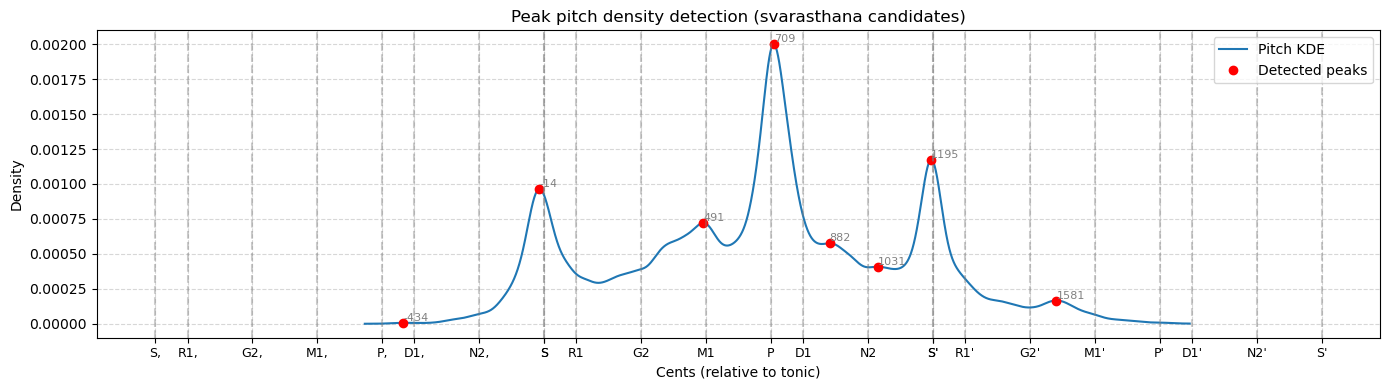

In [4]:
from src.features.pitch_distribution import compute_pitch_distribution_peaks_df
from src.utils.plot import plot_pitch_kde_with_svaras
from src.io.pitch_io import load_flat_regions
from src.features.flatness import extract_flat_regions, add_flat_id

recording_id = S.CURRENT_PIECE
BW_METHOD = 0.05

df = load_flat_regions(
    recording_id=recording_id,
    root_dir=DATA_INTERIM,
)
TONIC = S.SARASUDA_TONICS[recording_id]

grid_cents, density, peak_cents, peak_dens, df_peaks = compute_pitch_distribution_peaks_df(
    df,
    pitch_col="f0_savgol_p3_w13_cents",
    pitch_unit="cents",
    tonic_hz=TONIC,   # opcional; només si vols que també guardi peak_hz
    bw_method=BW_METHOD,
    recording_id=recording_id,
)
plot_pitch_kde_with_svaras(grid_cents, density, peak_cents, peak_dens, peaks_df=df_peaks)




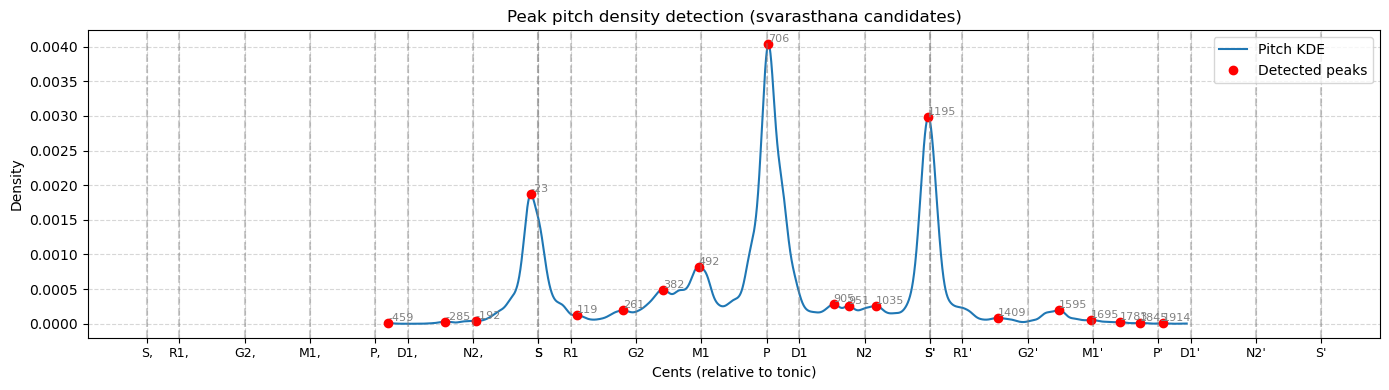

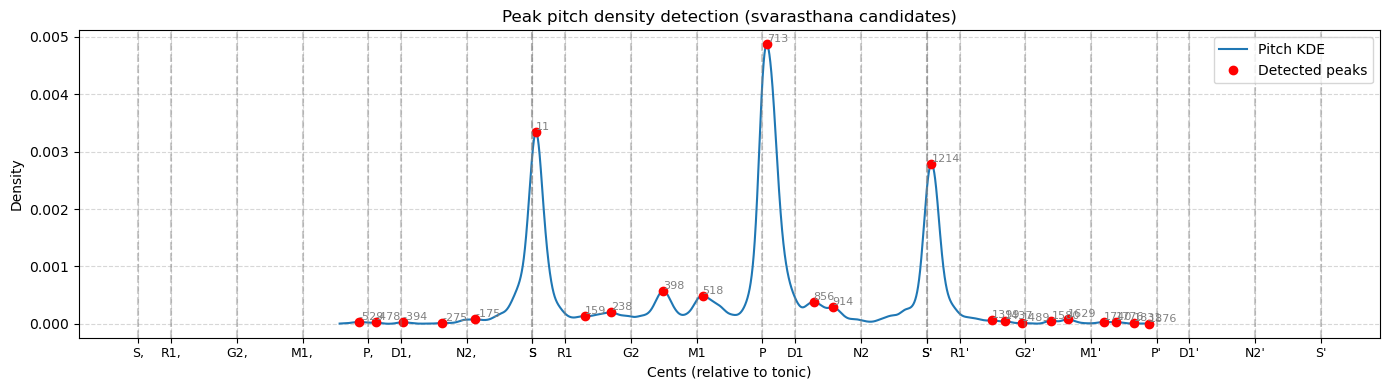

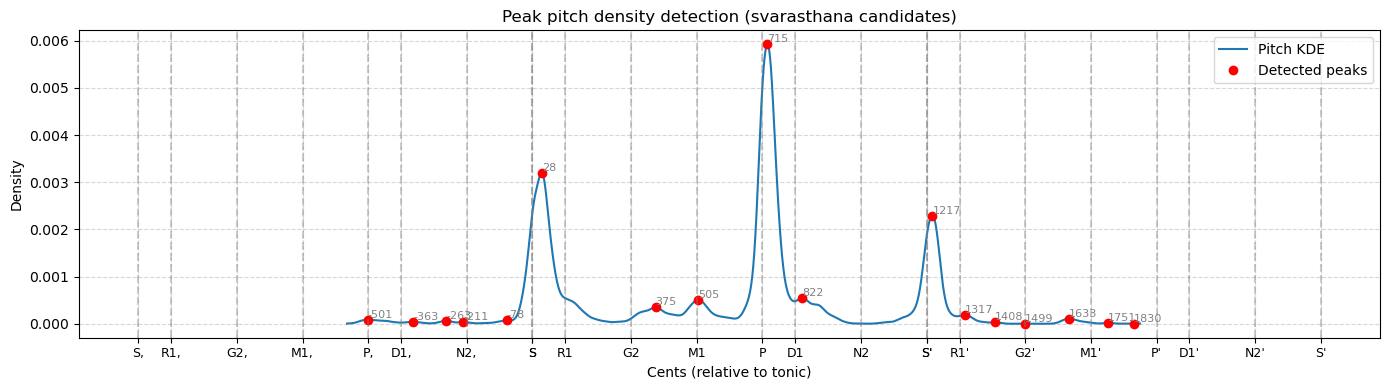

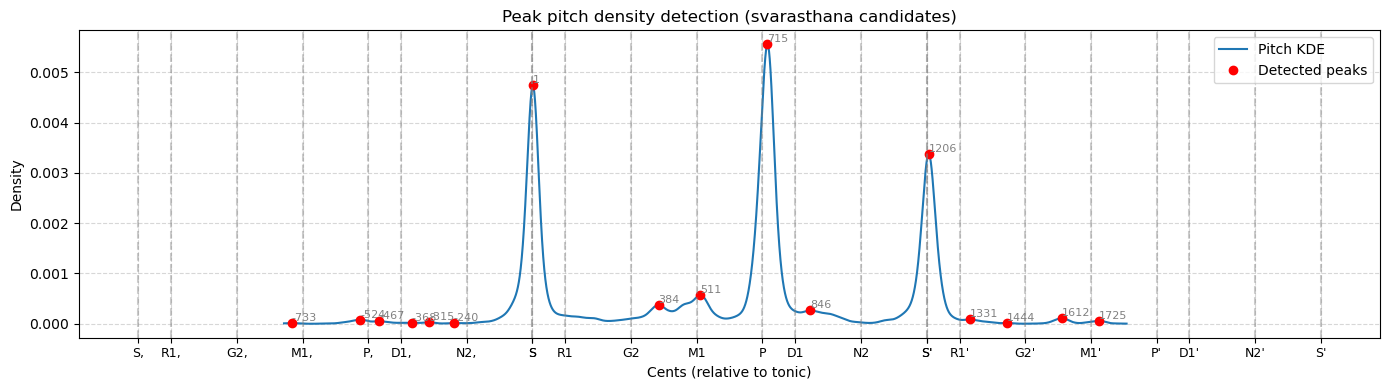

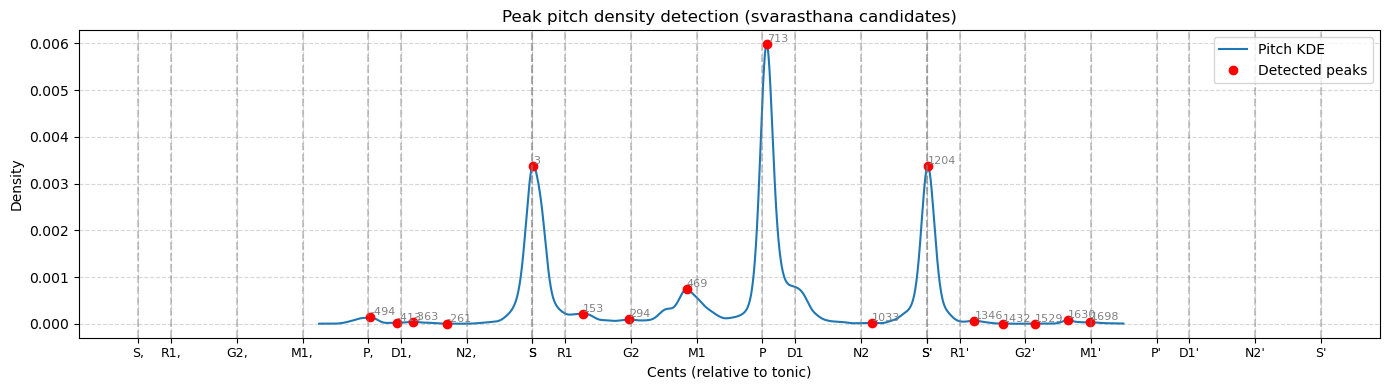

In [5]:
import polars as pl

for recording_id in S.SARASUDA_VARNAM:

    BW_METHOD = 0.03

    df = load_flat_regions(
        recording_id=recording_id,
        root_dir=DATA_INTERIM,
    )
    TONIC = S.SARASUDA_TONICS[recording_id]

    df_kde = df.filter(pl.col("flat_candidate") == True)

    grid_cents, density, peak_cents, peak_dens, df_peaks = compute_pitch_distribution_peaks_df(
        df_kde,
        pitch_col="f0_savgol_p3_w13_cents",
        pitch_unit="cents",
        bw_method=BW_METHOD,
        recording_id=recording_id,
    )

    plot_pitch_kde_with_svaras(grid_cents, density, peak_cents, peak_dens, peaks_df=df_peaks)
